# Data Preprocessing

### Import Libraries and Trace Generation Data generated from the SQL Server Profiler

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('./queries_copy.csv',parse_dates=['StartTime','EndTime'])
dataCopy = data.copy()

dataCopy

,RowNumber,EventClass,TextData,ApplicationName,LoginName,ClientProcessID,SPID,StartTime,CPU,Reads,...,EventSequence,GroupID,HostName,LoginSid,RequestID,RowCounts,ServerName,SessionLoginName,TransactionID,XactSequence
0,0,65528,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,65534,NaN,NaN,NaN,NaN,NaN,51:48.8,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,12,select * from Weather.dbo.weather,Python,temp,9372.0,58.0,51:58.6,0.0,99.0,...,1969.0,2.0,DESKTOP-7OQL1C2,0xDF5541092BCB7B41BE3A65E9E22A6817,0.0,0.0,DESKTOP-7OQL1C2,temp,NaN,0.000000e+00
3,3,12,select * from Telecom.dbo.telecom_users,Python,temp,9372.0,58.0,52:00.9,0.0,127.0,...,1970.0,2.0,DESKTOP-7OQL1C2,0xDF5541092BCB7B41BE3A65E9E22A6817,0.0,0.0,DESKTOP-7OQL1C2,temp,NaN,0.000000e+00
4,4,12,insert into Telecom.dbo.telecom_users values (...,Python,temp,9372.0,58.0,52:03.2,0.0,63.0,...,1971.0,2.0,DESKTOP-7OQL1C2,0xDF5541092BCB7B41BE3A65E9E22A6817,0.0,1.0,DESKTOP-7OQL1C2,temp,NaN,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3043,3043,12,select * from Telecom.dbo.telecom_users,Python,temp22,18080.0,71.0,00:59.7,0.0,21.0,...,5855.0,2.0,DESKTOP-7OQL1C2,0x181150103AAA084BBCB72F334E0D38C1,0.0,0.0,DESKTOP-7OQL1C2,temp22,263297.0,3.050000e+11
3044,3044,12,insert into Telecom.dbo.telecom_users values (...,Python,temp22,18080.0,71.0,01:01.8,0.0,63.0,...,5856.0,2.0,DESKTOP-7OQL1C2,0x181150103AAA084BBCB72F334E0D38C1,0.0,1.0,DESKTOP-7OQL1C2,temp22,263297.0,3.050000e+11
3045,3045,12,use Weather select top 1000 * from weather whe...,Python,temp22,18080.0,71.0,01:03.8,0.0,54.0,...,5857.0,2.0,DESKTOP-7OQL1C2,0x181150103AAA084BBCB72F334E0D38C1,0.0,0.0,DESKTOP-7OQL1C2,temp22,263297.0,3.050000e+11
3046,3046,12,use Telecom select top 1000 * from telecom_use...,Python,temp22,18080.0,71.0,01:05.8,0.0,32.0,...,5858.0,2.0,DESKTOP-7OQL1C2,0x181150103AAA084BBCB72F334E0D38C1,0.0,0.0,DESKTOP-7OQL1C2,temp22,263297.0,3.050000e+11


### Handling missing values

In [3]:
dataCopy.isna().sum()

RowNumber              0
EventClass             0
TextData               3
ApplicationName        3
LoginName              3
ClientProcessID     1052
SPID                   3
StartTime              1
CPU                    3
Reads                  3
Writes                 3
Duration               3
EndTime                3
DatabaseID             3
DatabaseName           3
Error                  3
EventSequence          3
GroupID                3
HostName               3
LoginSid               3
RequestID              3
RowCounts              3
ServerName             3
SessionLoginName       3
TransactionID       2080
XactSequence           3
dtype: int64

In [4]:
dataCopy['ClientProcessID'] = dataCopy['ClientProcessID'].fillna(0)
dataCopy['TransactionID'] = dataCopy['TransactionID'].fillna(0)

In [5]:
dataCopy.isna().sum()

RowNumber           0
EventClass          0
TextData            3
ApplicationName     3
LoginName           3
ClientProcessID     0
SPID                3
StartTime           1
CPU                 3
Reads               3
Writes              3
Duration            3
EndTime             3
DatabaseID          3
DatabaseName        3
Error               3
EventSequence       3
GroupID             3
HostName            3
LoginSid            3
RequestID           3
RowCounts           3
ServerName          3
SessionLoginName    3
TransactionID       0
XactSequence        3
dtype: int64

In [6]:
dataCopy.dropna(inplace=True)
dataCopy.reset_index(drop=True, inplace=True)
dataCopy

,RowNumber,EventClass,TextData,ApplicationName,LoginName,ClientProcessID,SPID,StartTime,CPU,Reads,...,EventSequence,GroupID,HostName,LoginSid,RequestID,RowCounts,ServerName,SessionLoginName,TransactionID,XactSequence
0,2,12,select * from Weather.dbo.weather,Python,temp,9372.0,58.0,51:58.6,0.0,99.0,...,1969.0,2.0,DESKTOP-7OQL1C2,0xDF5541092BCB7B41BE3A65E9E22A6817,0.0,0.0,DESKTOP-7OQL1C2,temp,0.0,0.000000e+00
1,3,12,select * from Telecom.dbo.telecom_users,Python,temp,9372.0,58.0,52:00.9,0.0,127.0,...,1970.0,2.0,DESKTOP-7OQL1C2,0xDF5541092BCB7B41BE3A65E9E22A6817,0.0,0.0,DESKTOP-7OQL1C2,temp,0.0,0.000000e+00
2,4,12,insert into Telecom.dbo.telecom_users values (...,Python,temp,9372.0,58.0,52:03.2,0.0,63.0,...,1971.0,2.0,DESKTOP-7OQL1C2,0xDF5541092BCB7B41BE3A65E9E22A6817,0.0,1.0,DESKTOP-7OQL1C2,temp,0.0,0.000000e+00
3,5,12,select * from Telecom.dbo.telecom_users,Python,temp,9372.0,58.0,52:05.2,0.0,6.0,...,1972.0,2.0,DESKTOP-7OQL1C2,0xDF5541092BCB7B41BE3A65E9E22A6817,0.0,0.0,DESKTOP-7OQL1C2,temp,135672.0,2.490000e+11
4,6,12,"insert into Weather.dbo.weather values (42.45,...",Python,temp,9372.0,58.0,52:07.3,0.0,100.0,...,1973.0,2.0,DESKTOP-7OQL1C2,0xDF5541092BCB7B41BE3A65E9E22A6817,0.0,1.0,DESKTOP-7OQL1C2,temp,0.0,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3040,3042,12,select * from Weather.dbo.weather,Python,temp22,18080.0,71.0,00:57.7,0.0,20.0,...,5854.0,2.0,DESKTOP-7OQL1C2,0x181150103AAA084BBCB72F334E0D38C1,0.0,0.0,DESKTOP-7OQL1C2,temp22,263297.0,3.050000e+11
3041,3043,12,select * from Telecom.dbo.telecom_users,Python,temp22,18080.0,71.0,00:59.7,0.0,21.0,...,5855.0,2.0,DESKTOP-7OQL1C2,0x181150103AAA084BBCB72F334E0D38C1,0.0,0.0,DESKTOP-7OQL1C2,temp22,263297.0,3.050000e+11
3042,3044,12,insert into Telecom.dbo.telecom_users values (...,Python,temp22,18080.0,71.0,01:01.8,0.0,63.0,...,5856.0,2.0,DESKTOP-7OQL1C2,0x181150103AAA084BBCB72F334E0D38C1,0.0,1.0,DESKTOP-7OQL1C2,temp22,263297.0,3.050000e+11
3043,3045,12,use Weather select top 1000 * from weather whe...,Python,temp22,18080.0,71.0,01:03.8,0.0,54.0,...,5857.0,2.0,DESKTOP-7OQL1C2,0x181150103AAA084BBCB72F334E0D38C1,0.0,0.0,DESKTOP-7OQL1C2,temp22,263297.0,3.050000e+11


### Calculating frequency of queries and categorizing a row containing hot or not (cold data) depending on the threshold frequency calculated below:

In [7]:
dataCopy['Frequency']=dataCopy['TextData'].replace(dataCopy['TextData'].value_counts())
dataCopy['HotData'] = 'n'
dataCopy

,RowNumber,EventClass,TextData,ApplicationName,LoginName,ClientProcessID,SPID,StartTime,CPU,Reads,...,HostName,LoginSid,RequestID,RowCounts,ServerName,SessionLoginName,TransactionID,XactSequence,Frequency,HotData
0,2,12,select * from Weather.dbo.weather,Python,temp,9372.0,58.0,51:58.6,0.0,99.0,...,DESKTOP-7OQL1C2,0xDF5541092BCB7B41BE3A65E9E22A6817,0.0,0.0,DESKTOP-7OQL1C2,temp,0.0,0.000000e+00,152,n
1,3,12,select * from Telecom.dbo.telecom_users,Python,temp,9372.0,58.0,52:00.9,0.0,127.0,...,DESKTOP-7OQL1C2,0xDF5541092BCB7B41BE3A65E9E22A6817,0.0,0.0,DESKTOP-7OQL1C2,temp,0.0,0.000000e+00,184,n
2,4,12,insert into Telecom.dbo.telecom_users values (...,Python,temp,9372.0,58.0,52:03.2,0.0,63.0,...,DESKTOP-7OQL1C2,0xDF5541092BCB7B41BE3A65E9E22A6817,0.0,1.0,DESKTOP-7OQL1C2,temp,0.0,0.000000e+00,55,n
3,5,12,select * from Telecom.dbo.telecom_users,Python,temp,9372.0,58.0,52:05.2,0.0,6.0,...,DESKTOP-7OQL1C2,0xDF5541092BCB7B41BE3A65E9E22A6817,0.0,0.0,DESKTOP-7OQL1C2,temp,135672.0,2.490000e+11,184,n
4,6,12,"insert into Weather.dbo.weather values (42.45,...",Python,temp,9372.0,58.0,52:07.3,0.0,100.0,...,DESKTOP-7OQL1C2,0xDF5541092BCB7B41BE3A65E9E22A6817,0.0,1.0,DESKTOP-7OQL1C2,temp,0.0,0.000000e+00,61,n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3040,3042,12,select * from Weather.dbo.weather,Python,temp22,18080.0,71.0,00:57.7,0.0,20.0,...,DESKTOP-7OQL1C2,0x181150103AAA084BBCB72F334E0D38C1,0.0,0.0,DESKTOP-7OQL1C2,temp22,263297.0,3.050000e+11,152,n
3041,3043,12,select * from Telecom.dbo.telecom_users,Python,temp22,18080.0,71.0,00:59.7,0.0,21.0,...,DESKTOP-7OQL1C2,0x181150103AAA084BBCB72F334E0D38C1,0.0,0.0,DESKTOP-7OQL1C2,temp22,263297.0,3.050000e+11,184,n
3042,3044,12,insert into Telecom.dbo.telecom_users values (...,Python,temp22,18080.0,71.0,01:01.8,0.0,63.0,...,DESKTOP-7OQL1C2,0x181150103AAA084BBCB72F334E0D38C1,0.0,1.0,DESKTOP-7OQL1C2,temp22,263297.0,3.050000e+11,55,n
3043,3045,12,use Weather select top 1000 * from weather whe...,Python,temp22,18080.0,71.0,01:03.8,0.0,54.0,...,DESKTOP-7OQL1C2,0x181150103AAA084BBCB72F334E0D38C1,0.0,0.0,DESKTOP-7OQL1C2,temp22,263297.0,3.050000e+11,171,n


In [8]:
threshold = dataCopy['Frequency'].mean()
threshold

110.18357963875205

In [9]:
dataCopy['HotData'].mask(dataCopy['Frequency'] > threshold, 'y', inplace=True)
dataCopy

,RowNumber,EventClass,TextData,ApplicationName,LoginName,ClientProcessID,SPID,StartTime,CPU,Reads,...,HostName,LoginSid,RequestID,RowCounts,ServerName,SessionLoginName,TransactionID,XactSequence,Frequency,HotData
0,2,12,select * from Weather.dbo.weather,Python,temp,9372.0,58.0,51:58.6,0.0,99.0,...,DESKTOP-7OQL1C2,0xDF5541092BCB7B41BE3A65E9E22A6817,0.0,0.0,DESKTOP-7OQL1C2,temp,0.0,0.000000e+00,152,y
1,3,12,select * from Telecom.dbo.telecom_users,Python,temp,9372.0,58.0,52:00.9,0.0,127.0,...,DESKTOP-7OQL1C2,0xDF5541092BCB7B41BE3A65E9E22A6817,0.0,0.0,DESKTOP-7OQL1C2,temp,0.0,0.000000e+00,184,y
2,4,12,insert into Telecom.dbo.telecom_users values (...,Python,temp,9372.0,58.0,52:03.2,0.0,63.0,...,DESKTOP-7OQL1C2,0xDF5541092BCB7B41BE3A65E9E22A6817,0.0,1.0,DESKTOP-7OQL1C2,temp,0.0,0.000000e+00,55,n
3,5,12,select * from Telecom.dbo.telecom_users,Python,temp,9372.0,58.0,52:05.2,0.0,6.0,...,DESKTOP-7OQL1C2,0xDF5541092BCB7B41BE3A65E9E22A6817,0.0,0.0,DESKTOP-7OQL1C2,temp,135672.0,2.490000e+11,184,y
4,6,12,"insert into Weather.dbo.weather values (42.45,...",Python,temp,9372.0,58.0,52:07.3,0.0,100.0,...,DESKTOP-7OQL1C2,0xDF5541092BCB7B41BE3A65E9E22A6817,0.0,1.0,DESKTOP-7OQL1C2,temp,0.0,0.000000e+00,61,n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3040,3042,12,select * from Weather.dbo.weather,Python,temp22,18080.0,71.0,00:57.7,0.0,20.0,...,DESKTOP-7OQL1C2,0x181150103AAA084BBCB72F334E0D38C1,0.0,0.0,DESKTOP-7OQL1C2,temp22,263297.0,3.050000e+11,152,y
3041,3043,12,select * from Telecom.dbo.telecom_users,Python,temp22,18080.0,71.0,00:59.7,0.0,21.0,...,DESKTOP-7OQL1C2,0x181150103AAA084BBCB72F334E0D38C1,0.0,0.0,DESKTOP-7OQL1C2,temp22,263297.0,3.050000e+11,184,y
3042,3044,12,insert into Telecom.dbo.telecom_users values (...,Python,temp22,18080.0,71.0,01:01.8,0.0,63.0,...,DESKTOP-7OQL1C2,0x181150103AAA084BBCB72F334E0D38C1,0.0,1.0,DESKTOP-7OQL1C2,temp22,263297.0,3.050000e+11,55,n
3043,3045,12,use Weather select top 1000 * from weather whe...,Python,temp22,18080.0,71.0,01:03.8,0.0,54.0,...,DESKTOP-7OQL1C2,0x181150103AAA084BBCB72F334E0D38C1,0.0,0.0,DESKTOP-7OQL1C2,temp22,263297.0,3.050000e+11,171,y


In [10]:
pd.crosstab(dataCopy['HotData'],dataCopy['Frequency'])

Frequency,1,2,4,5,6,7,9,10,11,12,...,68,135,152,164,171,172,173,179,184,188
HotData,,,,,,,,,,,,,,,,,,,,,
n,15,6,52,110,78,7,9,50,44,72,...,68,0,0,0,0,0,0,0,0,0
y,0,0,0,0,0,0,0,0,0,0,...,0,135,152,164,171,172,346,179,184,188


#### Need special case to handle non-numerical data

In [11]:
dataCopy.dtypes

RowNumber             int64
EventClass            int64
TextData             object
ApplicationName      object
LoginName            object
ClientProcessID     float64
SPID                float64
StartTime            object
CPU                 float64
Reads               float64
Writes              float64
Duration            float64
EndTime              object
DatabaseID          float64
DatabaseName         object
Error               float64
EventSequence       float64
GroupID             float64
HostName             object
LoginSid             object
RequestID           float64
RowCounts           float64
ServerName           object
SessionLoginName     object
TransactionID       float64
XactSequence        float64
Frequency             int64
HotData              object
dtype: object

#### Removing features with no unique values as they render to be irrelevant

In [14]:
dataCopy.nunique(axis=0)

RowNumber           3045
EventClass             1
TextData             114
ApplicationName        6
LoginName             25
ClientProcessID        7
SPID                  23
StartTime           2235
CPU                   20
Reads                197
Writes                14
Duration            2445
EndTime             1980
DatabaseID             7
DatabaseName           7
Error                  2
EventSequence       3045
GroupID                1
HostName               1
LoginSid              25
RequestID              1
RowCounts            129
ServerName             1
SessionLoginName      25
TransactionID         21
XactSequence          13
Frequency             35
HotData                2
dtype: int64

In [15]:
for col in dataCopy.columns:
    if len(dataCopy[col].unique()) == 1:
        dataCopy.drop(col,inplace=True,axis=1)
dataCopy.columns

Index(['RowNumber', 'TextData', 'ApplicationName', 'LoginName',
       'ClientProcessID', 'SPID', 'StartTime', 'CPU', 'Reads', 'Writes',
       'Duration', 'EndTime', 'DatabaseID', 'DatabaseName', 'Error',
       'EventSequence', 'LoginSid', 'RowCounts', 'SessionLoginName',
       'TransactionID', 'XactSequence', 'Frequency', 'HotData'],
      dtype='object')

### Data Analysis

#### As shown there are 114 unique queries in the trace generation data

In [13]:
dataCopy.TextData.nunique()

114

#### Gives most metrics for the data

In [12]:
dataCopy.describe()

,RowNumber,EventClass,ClientProcessID,SPID,CPU,Reads,Writes,Duration,DatabaseID,Error,EventSequence,GroupID,RequestID,RowCounts,TransactionID,XactSequence,Frequency
count,3045.000000,3045.0,3045.000000,3045.000000,3045.000000,3045.000000,3045.000000,3.045000e+03,3045.000000,3045.000000,3045.000000,3045.0,3045.0,3.045000e+03,3045.000000,3.045000e+03,3045.000000
mean,1524.000000,12.0,7447.224959,59.055501,6.640394,154.346798,0.129721,4.189166e+05,5.528736,0.340887,3778.133990,2.0,0.0,8.276114e+03,56806.796388,8.477307e+10,110.183580
std,879.160111,0.0,5767.673558,5.765330,78.623275,637.640198,1.130999,9.166376e+05,2.349318,0.752167,1216.343262,0.0,0.0,5.894910e+04,88973.597435,1.253947e+11,69.765504
min,2.000000,12.0,0.000000,51.000000,0.000000,0.000000,0.000000,1.500000e+01,1.000000,0.000000,1969.000000,2.0,0.0,0.000000e+00,0.000000,0.000000e+00,1.000000
25%,763.000000,12.0,0.000000,53.000000,0.000000,6.000000,0.000000,5.590000e+02,5.000000,0.000000,2736.000000,2.0,0.0,0.000000e+00,0.000000,0.000000e+00,47.000000
50%,1524.000000,12.0,9372.000000,59.000000,0.000000,35.000000,0.000000,3.422000e+03,6.000000,0.000000,3497.000000,2.0,0.0,1.000000e+00,0.000000,0.000000e+00,152.000000
75%,2285.000000,12.0,12580.000000,63.000000,0.000000,114.000000,0.000000,1.937100e+04,7.000000,0.000000,5072.000000,2.0,0.0,3.030000e+02,138928.000000,2.280000e+11,173.000000
max,3046.000000,12.0,18080.000000,75.000000,3046.000000,30142.000000,23.000000,1.622099e+07,9.000000,2.000000,5858.000000,2.0,0.0,2.444436e+06,263297.000000,3.140000e+11,188.000000


In [16]:
pd.crosstab([dataCopy['DatabaseID'],dataCopy['DatabaseName']],dataCopy['Frequency'])

,Frequency,1,2,4,5,6,7,9,10,11,12,...,68,135,152,164,171,172,173,179,184,188
DatabaseID,DatabaseName,,,,,,,,,,,,,,,,,,,,,
1.0,master,6,4,4,30,57,7,9,31,11,60,...,3,8,8,0,0,7,12,9,8,0
4.0,msdb,0,0,0,0,0,0,0,0,0,12,...,0,0,0,0,0,0,0,0,0,0
5.0,CabRides,3,0,12,10,5,0,0,2,11,0,...,15,29,33,164,0,42,35,39,45,0
6.0,Students,1,0,12,14,5,0,0,1,11,0,...,15,39,39,0,0,56,58,54,50,188
7.0,Telecom,2,0,12,15,0,0,0,1,11,0,...,21,27,33,0,0,35,210,36,42,0
8.0,Weather,3,2,12,26,6,0,0,5,0,0,...,14,32,39,0,171,32,31,41,39,0
9.0,Trace,0,0,0,15,5,0,0,10,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
pd.crosstab([dataCopy['Reads']],dataCopy['Frequency'])

Frequency,1,2,4,5,6,7,9,10,11,12,...,68,135,152,164,171,172,173,179,184,188
Reads,,,,,,,,,,,,,,,,,,,,,
0.0,1,0,8,61,60,7,9,30,34,34,...,0,0,0,0,0,0,0,0,0,0
1.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,40,0,43,0,0
2.0,0,0,0,0,0,0,0,0,0,16,...,0,0,0,0,0,2,0,6,0,0
3.0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4.0,0,0,0,0,0,0,0,5,0,0,...,0,0,0,0,0,1,0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1861.0,0,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,0,0,0
1916.0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2317.0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Engineering Categorical Features

In [18]:
dataCopy = pd.get_dummies(dataCopy, columns=['TextData'], prefix = 'Query')
dataCopy = pd.get_dummies(dataCopy, columns=['ApplicationName'], prefix = 'ApplicationName')
dataCopy = pd.get_dummies(dataCopy, columns=['LoginName'], prefix = 'LoginName')
dataCopy = pd.get_dummies(dataCopy, columns=['DatabaseName'], prefix = 'DatabaseName')

dataCopy

,RowNumber,ClientProcessID,SPID,StartTime,CPU,Reads,Writes,Duration,EndTime,DatabaseID,...,LoginName_temp7,LoginName_temp8,LoginName_temp9,DatabaseName_CabRides,DatabaseName_Students,DatabaseName_Telecom,DatabaseName_Trace,DatabaseName_Weather,DatabaseName_master,DatabaseName_msdb
0,2,9372.0,58.0,51:58.6,0.0,99.0,0.0,2336357.0,52:00.9,1.0,...,0,0,0,0,0,0,0,0,1,0
1,3,9372.0,58.0,52:00.9,0.0,127.0,0.0,2339646.0,52:03.2,1.0,...,0,0,0,0,0,0,0,0,1,0
2,4,9372.0,58.0,52:03.2,0.0,63.0,0.0,8470.0,52:03.2,1.0,...,0,0,0,0,0,0,0,0,1,0
3,5,9372.0,58.0,52:05.2,0.0,6.0,0.0,2020313.0,52:07.3,1.0,...,0,0,0,0,0,0,0,0,1,0
4,6,9372.0,58.0,52:07.3,0.0,100.0,1.0,4249.0,52:07.3,1.0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3040,3042,18080.0,71.0,00:57.7,0.0,20.0,0.0,2011701.0,00:59.7,7.0,...,0,0,0,0,0,1,0,0,0,0
3041,3043,18080.0,71.0,00:59.7,0.0,21.0,0.0,2009220.0,01:01.8,7.0,...,0,0,0,0,0,1,0,0,0,0
3042,3044,18080.0,71.0,01:01.8,0.0,63.0,0.0,2479.0,01:01.8,7.0,...,0,0,0,0,0,1,0,0,0,0
3043,3045,18080.0,71.0,01:03.8,0.0,54.0,0.0,2015868.0,01:05.8,8.0,...,0,0,0,0,0,0,0,1,0,0


# Prediction Model - Decision Tree Classifier

In this section, we apply a decision tree classifier to predict the frequency of queries that
would be prefetched in a cache and identify hot data.

#### Extract target class from features and remove irrelevant features

In [19]:
Y = dataCopy['HotData']
X = dataCopy.drop(['RowNumber','StartTime','EndTime','DatabaseID','SessionLoginName','LoginSid','XactSequence','Frequency','HotData'],axis=1)

#### Training and Test set creation

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.8, random_state=1)

#### Model fitting and evaluation

Text(0, 0.5, 'Accuracy')

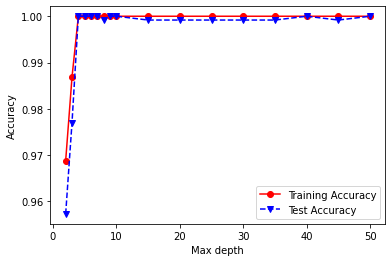

In [22]:
from sklearn import tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from numpy.random import random

%matplotlib inline

maxdepths = [2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50]

trainAcc = np.zeros(len(maxdepths))
testAcc = np.zeros(len(maxdepths))

index = 0
for depth in maxdepths:
    clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=depth)
    clf = clf.fit(X_train, Y_train)
    Y_predTrain = clf.predict(X_train)
    Y_predTest = clf.predict(X_test)
    trainAcc[index] = accuracy_score(Y_train, Y_predTrain)
    testAcc[index] = accuracy_score(Y_test, Y_predTest)
    index += 1
    
#########################################
# Plot of training and test accuracies
#########################################
    
plt.plot(maxdepths,trainAcc,'ro-',maxdepths,testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Max depth')
plt.ylabel('Accuracy')

### Build the decision tree classifier and train data

As observed there is a 99% accuracy for predictions

In [23]:
clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=25)
clf = clf.fit(X_train, Y_train)
Y_predTrain = clf.predict(X_train)
Y_predTest = clf.predict(X_test)
trainAcc = accuracy_score(Y_train, Y_predTrain)
testAcc = accuracy_score(Y_test, Y_predTest)
print(trainAcc,testAcc)

1.0 0.9991789819376026


#### Predictions

In [24]:
Y_test_copy = Y_test.reset_index(drop=True)
predictions = pd.concat([Y_test_copy,pd.Series(Y_predTest,name='Predicted Class')], axis=1)
predictions

,HotData,Predicted Class
0,n,n
1,y,y
2,y,y
3,y,y
4,n,n
...,...,...
2431,n,n
2432,n,n
2433,y,y
2434,y,y


### Extracting frequent queries from the predictions

In [25]:
X_test_copy = X_test.reset_index(drop=True)
result_with_frequency_predictions = pd.concat([X_test_copy,pd.Series(Y_predTest,name='HotData')], axis=1)
result_with_frequency_predictions

,ClientProcessID,SPID,CPU,Reads,Writes,Duration,Error,EventSequence,RowCounts,TransactionID,...,LoginName_temp8,LoginName_temp9,DatabaseName_CabRides,DatabaseName_Students,DatabaseName_Telecom,DatabaseName_Trace,DatabaseName_Weather,DatabaseName_master,DatabaseName_msdb,HotData
0,9372.0,58.0,0.0,23.0,0.0,20190.0,0.0,1975.0,1.0,135672.0,...,0,0,1,0,0,0,0,0,0,n
1,0.0,59.0,15.0,173.0,0.0,15359.0,0.0,3378.0,6299.0,0.0,...,0,0,0,0,1,0,0,0,0,y
2,0.0,59.0,0.0,36.0,0.0,1050.0,0.0,3305.0,1086.0,0.0,...,0,0,0,1,0,0,0,0,0,y
3,18080.0,70.0,0.0,53.0,0.0,2008416.0,2.0,5782.0,0.0,262334.0,...,0,0,0,0,0,0,1,0,0,y
4,12580.0,55.0,0.0,0.0,0.0,94.0,0.0,5062.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2431,12580.0,55.0,16.0,401.0,0.0,15833.0,0.0,5271.0,1.0,0.0,...,0,0,0,1,0,0,0,0,0,n
2432,12580.0,53.0,0.0,0.0,0.0,102.0,0.0,4262.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,n
2433,9372.0,58.0,0.0,53.0,0.0,2015076.0,2.0,2035.0,0.0,135672.0,...,0,0,0,0,0,0,1,0,0,y
2434,0.0,59.0,0.0,114.0,0.0,1397.0,0.0,3030.0,1.0,0.0,...,0,0,0,0,1,0,0,0,0,y


In [26]:
rows_with_predicted_hot_data = result_with_frequency_predictions.loc[result_with_frequency_predictions['HotData'] == 'y']

query_columns = rows_with_predicted_hot_data.filter(like='Query_').columns
rows_with_predicted_hot_data = rows_with_predicted_hot_data[query_columns]


In [27]:
for col in rows_with_predicted_hot_data.columns:
    if (rows_with_predicted_hot_data[col] == 0).all() == True:
        rows_with_predicted_hot_data.drop(col,inplace=True,axis=1)
print(len(rows_with_predicted_hot_data.columns),rows_with_predicted_hot_data.columns)

e InternetService='DSL';      use Weather select top 1000 * from weather where location='Fenway';      insert into CabRides.dbo.cab_rides values (0.44, 'Lyft', 1540000000000, 'North Station', 'Haymarket Square', 16.5, 1, 'e8bac1d1-6e83-4ebd-a0a9-bfcf9de1a86f', 'lyft_line', 'UberX');      insert into Students.dbo.StudentsPerformance values ('female', 'group B', 'bachelors degree', 'standard', 'completed', 72, 80, 94);      insert into Telecom.dbo.telecom_users values (6780, '7010-BRBUU', 'Male', 0, 'Yes', 'No', 75, 'Yes', 'No', 'DSL', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'Two Year', 'Yes', 'Credit card', 24.2, 3370.2, 'No');      insert into Weather.dbo.weather values (42.45, 'Fenway', 1, 1012.17, 0.1089, default, 0.96, 1.53);      delete top (1) from CabRides.dbo.cab_rides where name='Lyft';      delete top (1) from Students.dbo.StudentsPerformance where gender='male';      delete top (1) from Telecom.dbo.telecom_users where InternetService='DSL';      delete top (1) from Weather.dbo.

### Writing the frequent queries with hot data to output file 

In [28]:
queries_with_hot_data_file = open('frequent_queries.txt','w')  
i = 1
for item in rows_with_predicted_hot_data.columns:   
    queries_with_hot_data_file.write('Frequent Query '+str(i)+': '+ str(item)[6:] +'\n')
    i += 1

queries_with_hot_data_file.write('_______________________________ \n')

queries_with_hot_data_file.close()

### Visualization of the Decision Tree Classifier

In [29]:
uniqueFrequencies = Y.unique()
classLabels = []

for value in uniqueFrequencies:
    classLabels.append(str(value))
classLabels

['y', 'n']

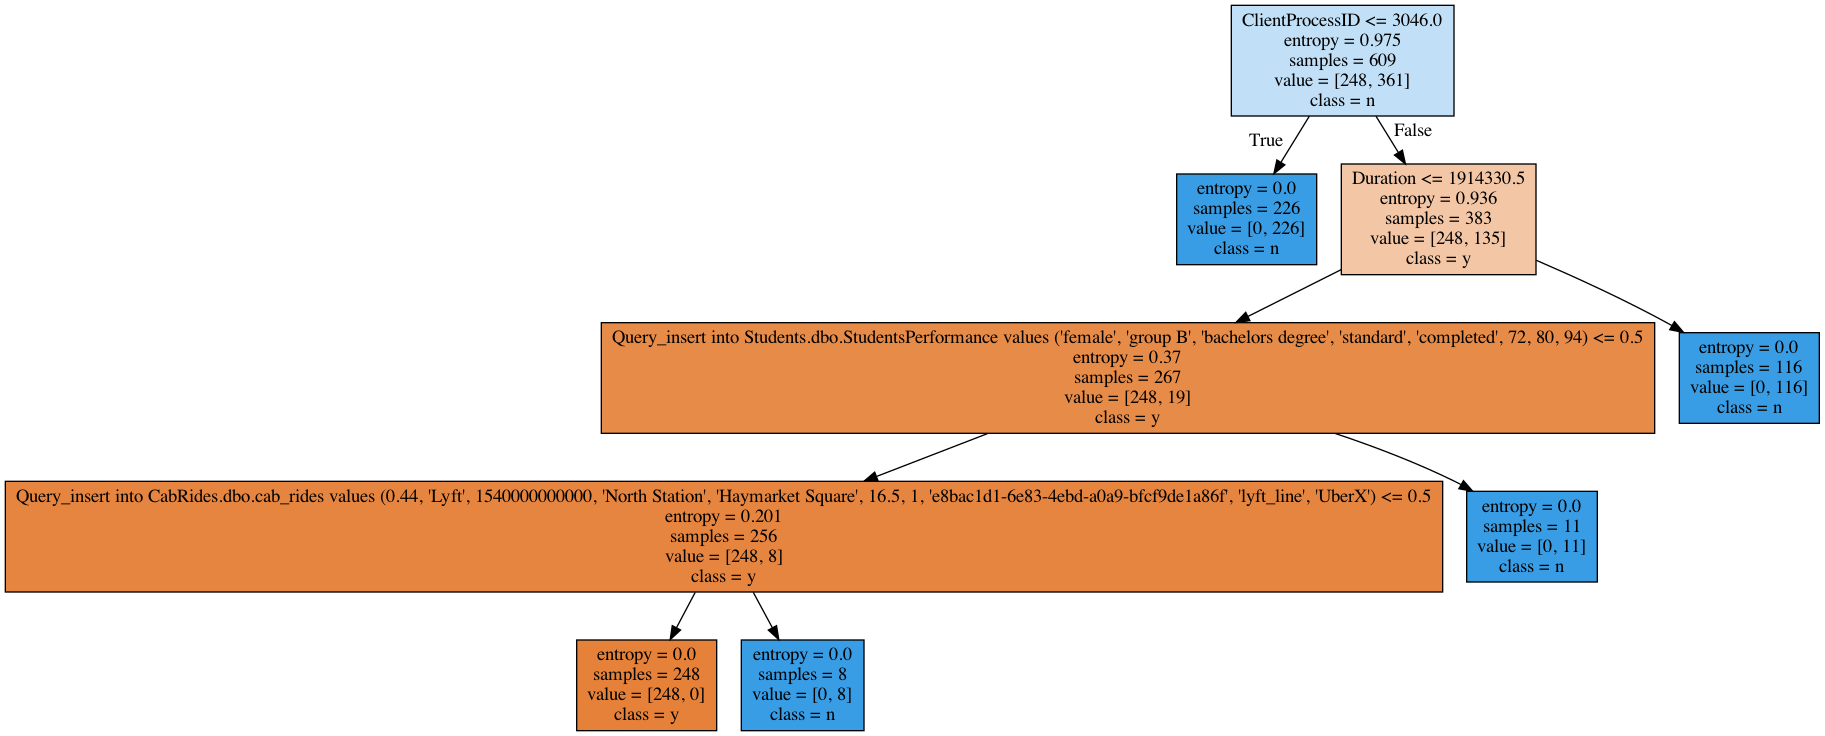

In [30]:
import pydotplus 
from IPython.display import Image

dot_data = tree.export_graphviz(clf, feature_names=X_test.columns, class_names=classLabels, filled=True, 
                                out_file=None) 
graph = pydotplus.graph_from_dot_data(dot_data) 
Image(graph.create_png())